In [1]:
import glob
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
palette = {'all_kfold': 'tab:blue', 'ts': 'tab:orange', 'all_nested': 'tab:green', 'fs_nested_pt_kfold': 'tab:red', 'fs_kfold_pt_nested': 'tab:purple'}

In [3]:
path = os.getcwd()
data_files = glob.glob(os.path.join(path, "binary/binary*"))

li = []
for filename in data_files:
    df = pd.read_csv(filename)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

new_names = dict([(i,'metric_'+ i) for i in df.iloc[0:1,9:].columns.values])
df.rename(columns=new_names, inplace=True)

df = df[df['metric_accuracy'].notna()]
df

,model,main_metric,sample_size,feature_selector,feature_selection_frac,validation_type,train_size,cv_split_size,par_split_size,metric_accuracy,metric_balanced_accuracy,metric_f1,metric_precision,metric_recall
0,logistic_regression,accuracy,0.03,rfe,0.4,ts,0.6,NaN,2,0.545455,0.550000,0.545455,0.554545,0.545455
1,logistic_regression,accuracy,0.03,rfe,0.4,ts,0.6,NaN,2,0.545455,0.550000,0.545455,0.554545,0.545455
2,logistic_regression,accuracy,0.03,rfe,0.4,ts,0.6,NaN,2,0.727273,0.716667,0.722611,0.730519,0.727273
3,logistic_regression,accuracy,0.03,rfe,0.4,ts,0.6,NaN,2,0.818182,0.833333,0.815152,0.870130,0.818182
4,logistic_regression,accuracy,0.03,rfe,0.4,ts,0.6,NaN,2,0.636364,0.633333,0.636364,0.636364,0.636364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837355,svm,recall,1.00,rfe,1.0,all_kfold,NaN,NaN,13,0.660935,0.651888,0.656214,0.662116,0.660935
837356,svm,recall,1.00,rfe,1.0,all_kfold,NaN,NaN,13,0.658629,0.648269,0.653809,0.658302,0.658629
837357,svm,recall,1.00,rfe,1.0,all_kfold,NaN,NaN,13,0.670717,0.659993,0.666249,0.670097,0.670717
837358,svm,recall,1.00,rfe,1.0,all_kfold,NaN,NaN,13,0.649992,0.639148,0.645330,0.660219,0.649992


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 837000 entries, 0 to 837359
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   model                     837000 non-null  object 
 1   main_metric               837000 non-null  object 
 2   sample_size               837000 non-null  float64
 3   feature_selector          837000 non-null  object 
 4   feature_selection_frac    837000 non-null  float64
 5   validation_type           837000 non-null  object 
 6   train_size                132000 non-null  float64
 7   cv_split_size             660000 non-null  float64
 8   par_split_size            837000 non-null  int64  
 9   metric_accuracy           837000 non-null  float64
 10  metric_balanced_accuracy  837000 non-null  float64
 11  metric_f1                 837000 non-null  float64
 12  metric_precision          837000 non-null  float64
 13  metric_recall             837000 non-null  f

In [5]:
data = df
data = data.reset_index()
pivoted_all = pd.wide_to_long(data, stubnames='metric', i='index', j='metric_type', sep='_', suffix=r'\w+')
pivoted_all.reset_index(inplace=True)
pivoted_all = pivoted_all.drop('index', axis=1)
pivoted_all.rename(columns={'metric': 'metric_measurement'}, inplace=True)
r = pivoted_all['sample_size'] * 918
pivoted_all['sample_size'] = r
pivoted_all

,metric_type,feature_selection_frac,train_size,sample_size,model,cv_split_size,main_metric,feature_selector,par_split_size,validation_type,metric_measurement
0,accuracy,0.4,0.6,27.54,logistic_regression,NaN,accuracy,rfe,2,ts,0.545455
1,accuracy,0.4,0.6,27.54,logistic_regression,NaN,accuracy,rfe,2,ts,0.545455
2,accuracy,0.4,0.6,27.54,logistic_regression,NaN,accuracy,rfe,2,ts,0.727273
3,accuracy,0.4,0.6,27.54,logistic_regression,NaN,accuracy,rfe,2,ts,0.818182
4,accuracy,0.4,0.6,27.54,logistic_regression,NaN,accuracy,rfe,2,ts,0.636364
...,...,...,...,...,...,...,...,...,...,...,...
4184995,recall,1.0,NaN,918.00,svm,NaN,recall,rfe,13,all_kfold,0.660935
4184996,recall,1.0,NaN,918.00,svm,NaN,recall,rfe,13,all_kfold,0.658629
4184997,recall,1.0,NaN,918.00,svm,NaN,recall,rfe,13,all_kfold,0.670717
4184998,recall,1.0,NaN,918.00,svm,NaN,recall,rfe,13,all_kfold,0.649992


Same metrics for varying, but reduced parameter split size OR varying feature selection frac for ts, kfold and nested; cv split size, trainsize fixed.

In [26]:
same_metrics = pivoted_all[pivoted_all['main_metric'] == pivoted_all['metric_type']]
same_metrics_fixed = same_metrics[((same_metrics['train_size'] == 0.8) | same_metrics['train_size'].isna())
    & ((same_metrics['cv_split_size'] == 13.0) | same_metrics['cv_split_size'].isna()) & ((same_metrics['par_split_size'] == 2.0) | (same_metrics['par_split_size'] == 7.0) | (same_metrics['par_split_size'] == 13.0)) & ((same_metrics['validation_type'] == 'ts') | (same_metrics['validation_type'] == 'all_nested') | (same_metrics['validation_type'] == 'all_kfold'))]

same_metrics_fixed_feature = same_metrics_fixed[same_metrics_fixed['feature_selection_frac'] == 1.0]
same_metrics_fixed_par = same_metrics_fixed[same_metrics_fixed['par_split_size'] == 13.0]

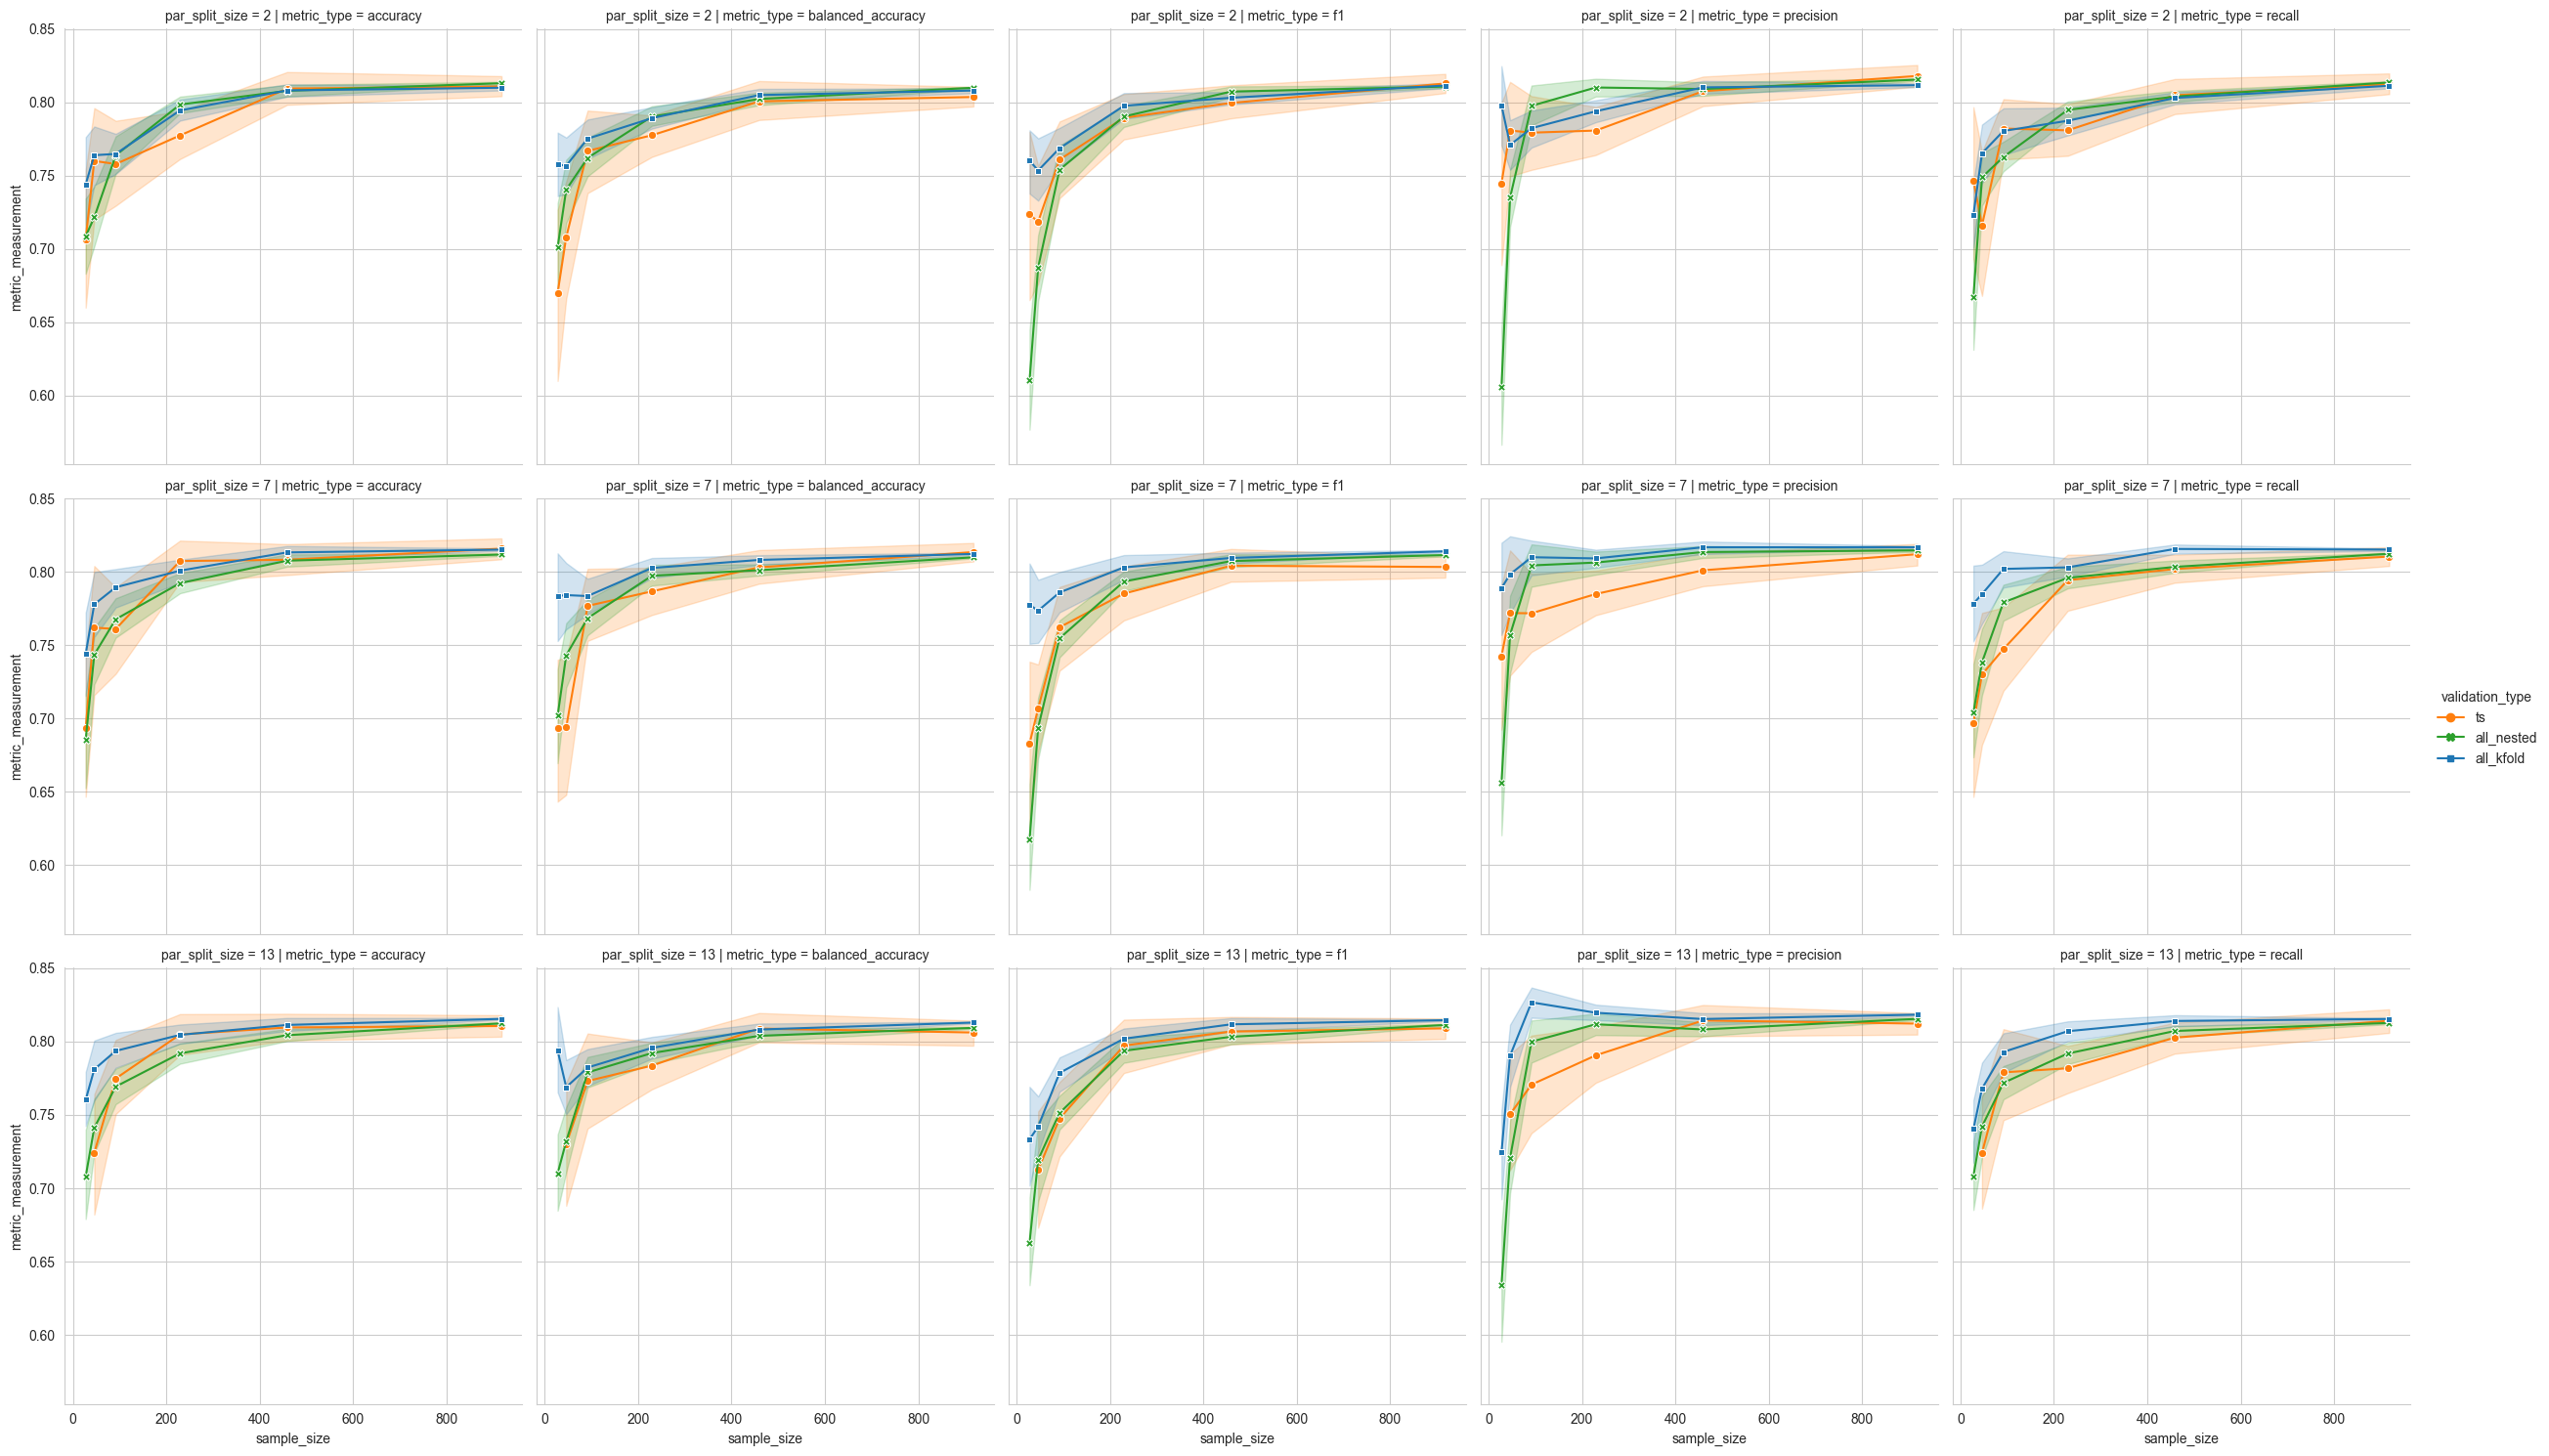

In [27]:
same_metrics_fixed_feature_lr = same_metrics_fixed_feature[same_metrics_fixed_feature['model'] == 'logistic_regression']
sns.relplot(x='sample_size', data=same_metrics_fixed_feature_lr, hue='validation_type', kind='line', y='metric_measurement', ci=95, row='par_split_size', col='metric_type', palette=palette, style='validation_type', markers=True, dashes=False)
plt.show()

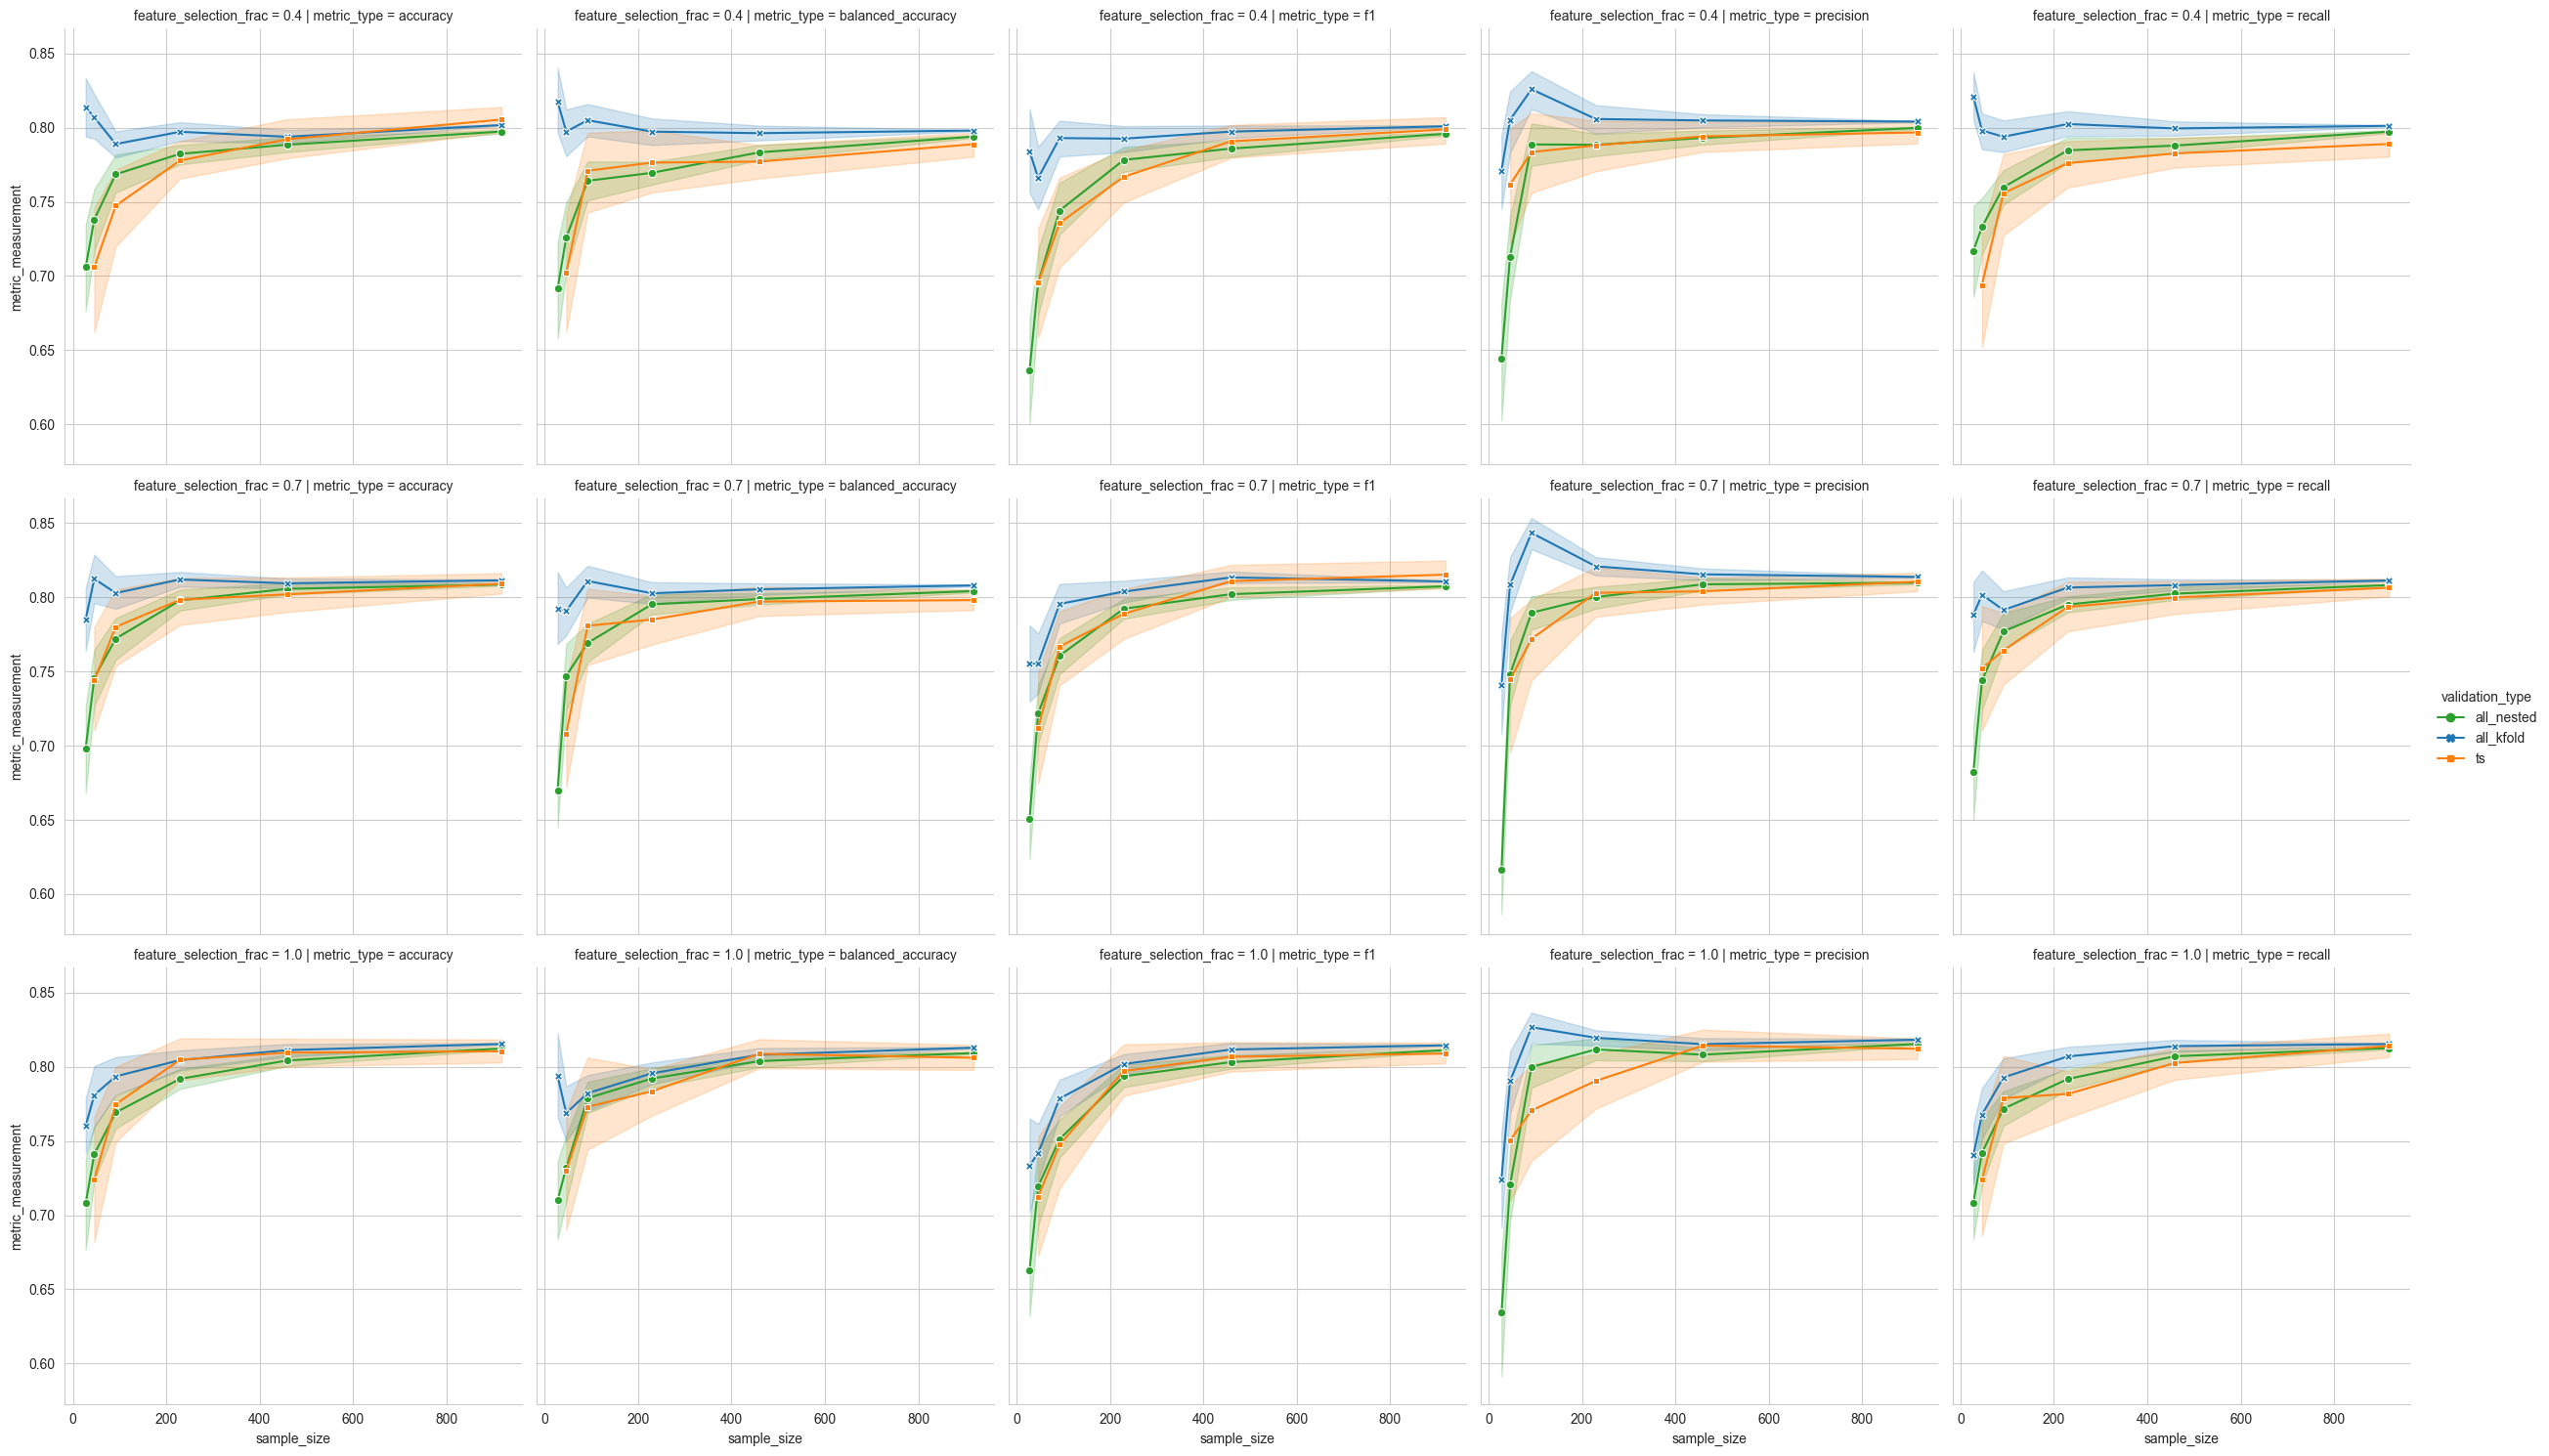

In [28]:
same_metrics_fixed_par_lr = same_metrics_fixed_par[same_metrics_fixed_par['model'] == 'logistic_regression']
sns.relplot(x='sample_size', data=same_metrics_fixed_par_lr, hue='validation_type', kind='line', y='metric_measurement', ci=95, row='feature_selection_frac', col='metric_type', palette=palette, style='validation_type', markers=True, dashes=False)
plt.show()

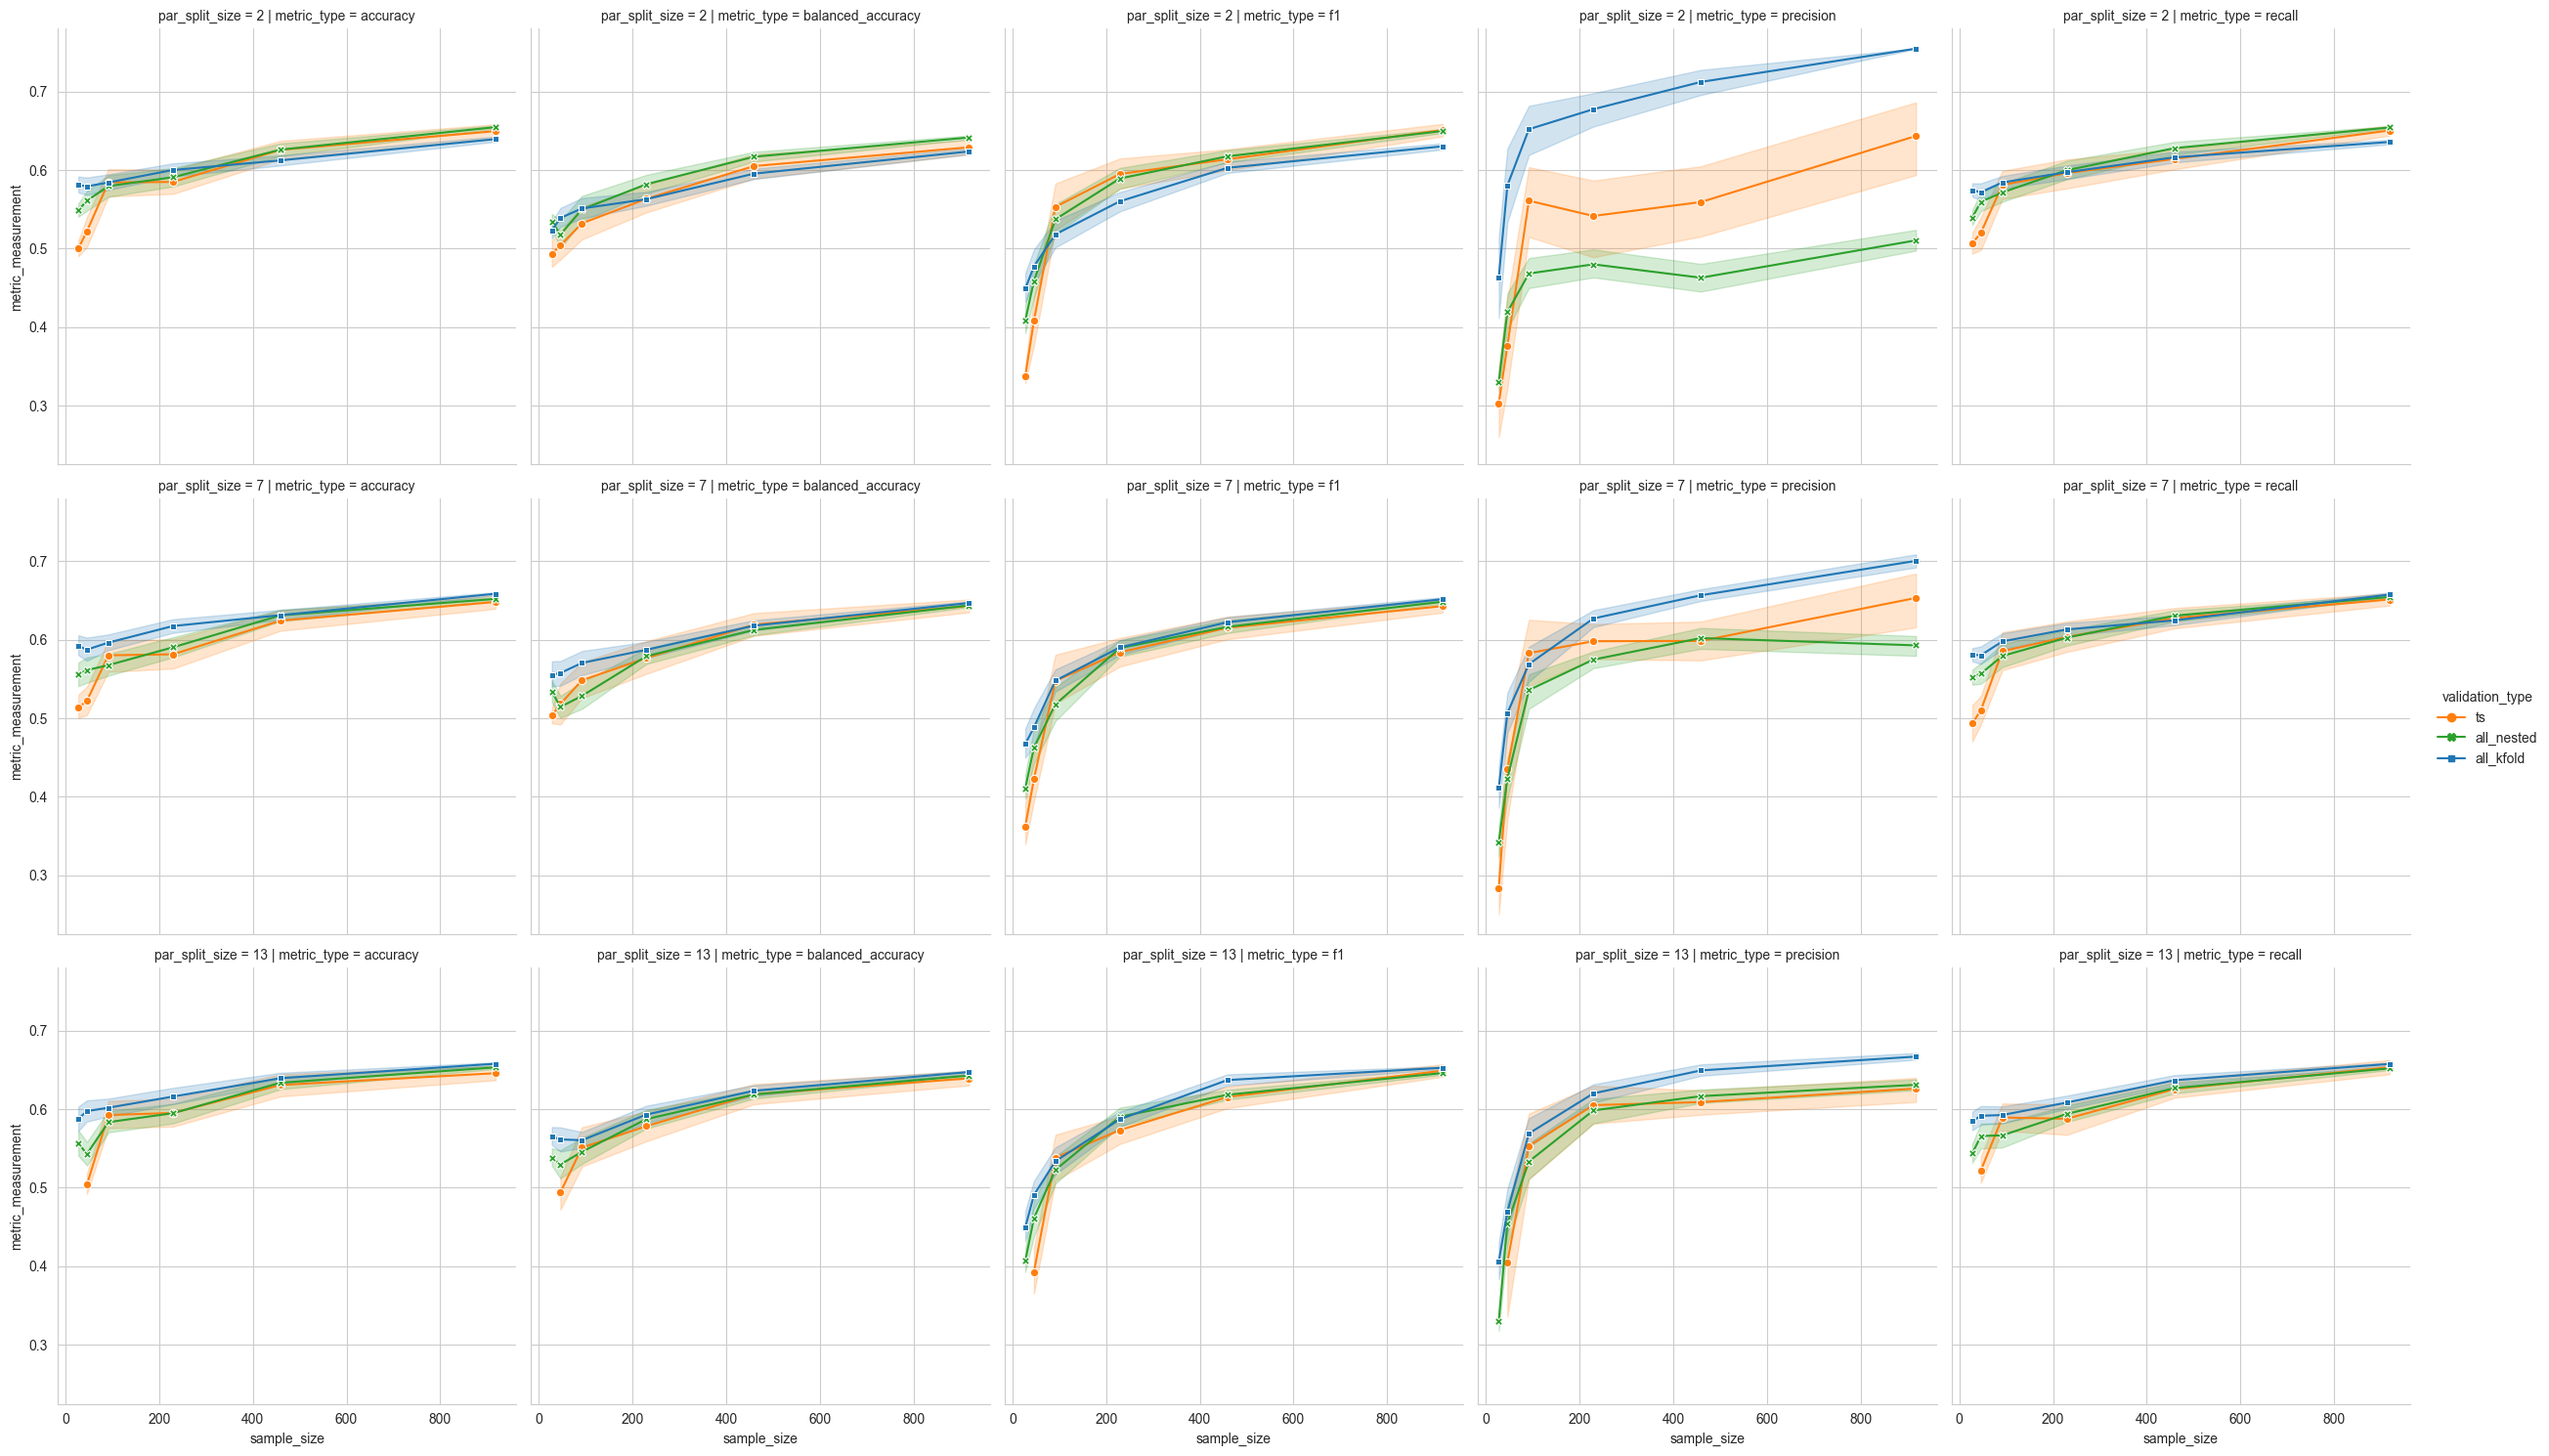

In [29]:
same_metrics_fixed_feature_svm = same_metrics_fixed_feature[same_metrics_fixed_feature['model'] == 'svm']
sns.relplot(x='sample_size', data=same_metrics_fixed_feature_svm, hue='validation_type', kind='line', y='metric_measurement', ci=95, row='par_split_size', col='metric_type', palette=palette, style='validation_type', markers=True, dashes=False)
plt.show()

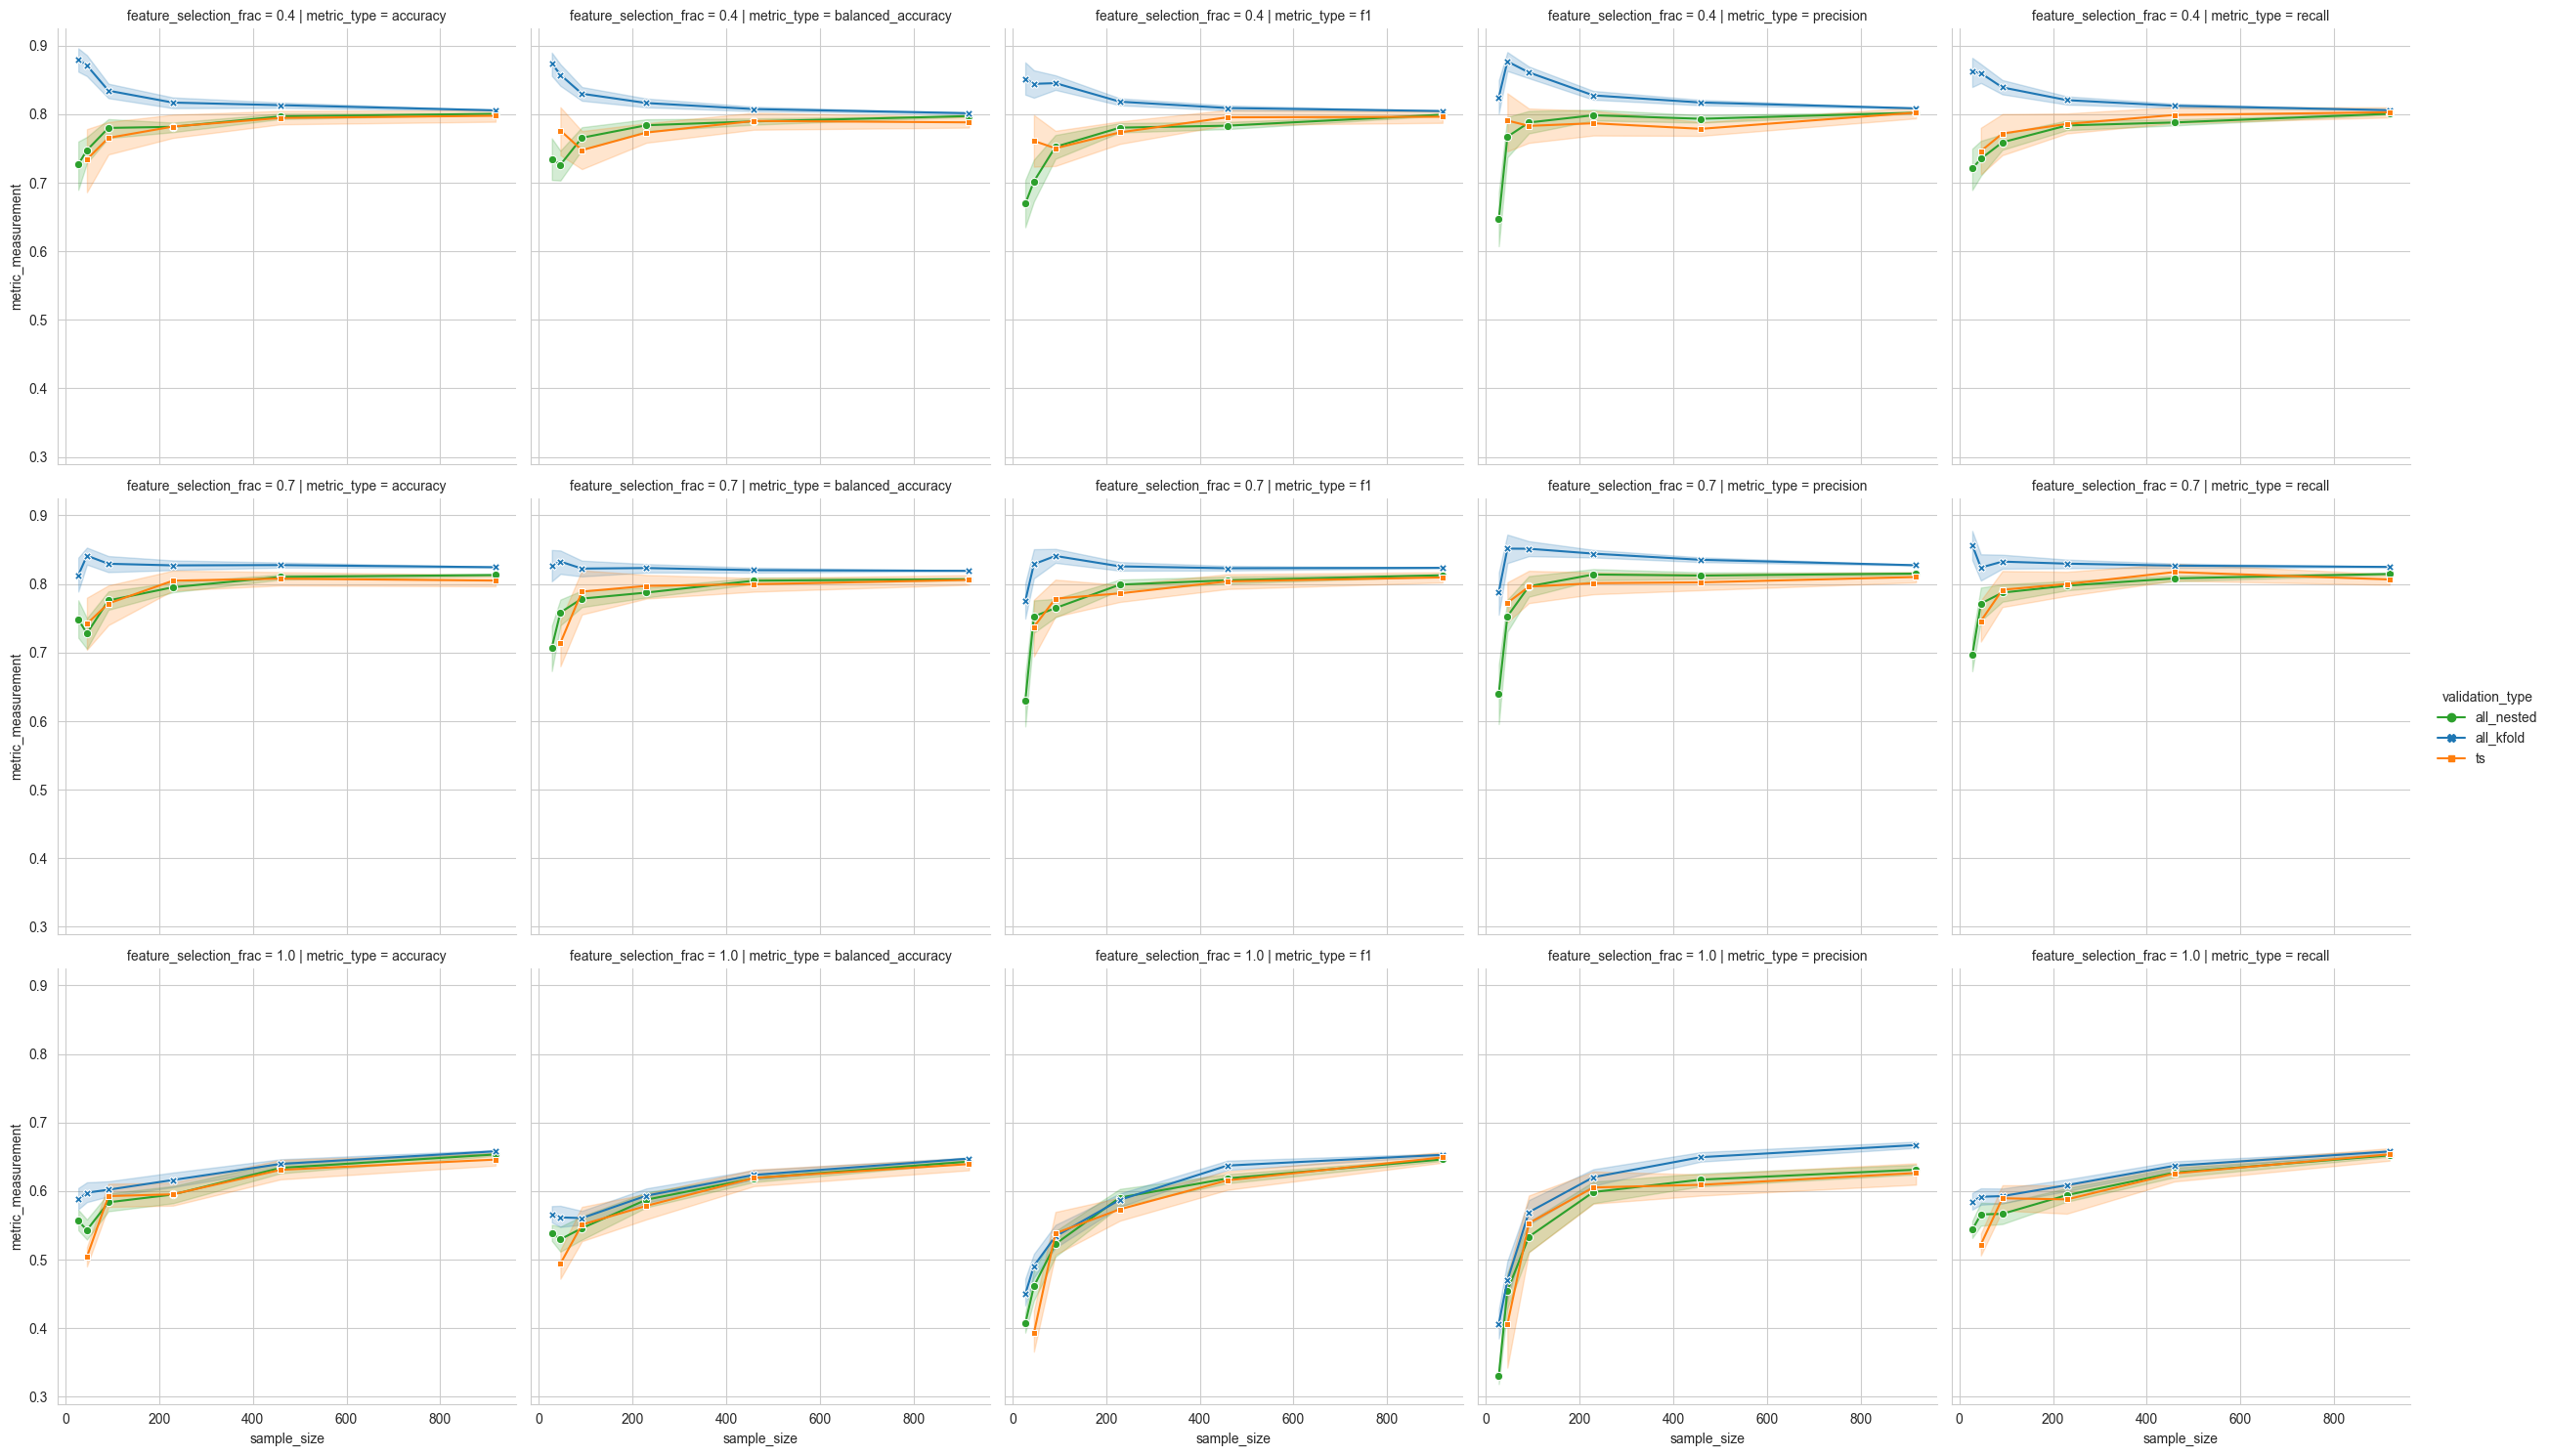

In [30]:
same_metrics_fixed_par_svm = same_metrics_fixed_par[same_metrics_fixed_par['model'] == 'svm']
sns.relplot(x='sample_size', data=same_metrics_fixed_par_svm, hue='validation_type', kind='line', y='metric_measurement', ci=95, row='feature_selection_frac', col='metric_type', palette=palette, style='validation_type', markers=True, dashes=False)
plt.show()

Here starts another section... fixed train size, cv split size and metric only accuracy.

In [31]:
acc_par_and_feature = pivoted_all[
    (pivoted_all['main_metric'] == 'accuracy')
    & (pivoted_all['metric_type'] == 'accuracy')
    & ((pivoted_all['train_size'] == 0.8) | pivoted_all['train_size'].isna())
    & ((pivoted_all['cv_split_size'] == 13.0) | pivoted_all['cv_split_size'].isna())]

In [32]:
acc_par_and_feature_lr = acc_par_and_feature[acc_par_and_feature['model'] == 'logistic_regression']
acc_par_and_feature_lr

,metric_type,feature_selection_frac,train_size,sample_size,model,cv_split_size,main_metric,feature_selector,par_split_size,validation_type,metric_measurement
50,accuracy,0.4,0.8,27.54,logistic_regression,NaN,accuracy,rfe,2,ts,0.833333
51,accuracy,0.4,0.8,27.54,logistic_regression,NaN,accuracy,rfe,2,ts,0.833333
52,accuracy,0.4,0.8,27.54,logistic_regression,NaN,accuracy,rfe,2,ts,0.666667
53,accuracy,0.4,0.8,27.54,logistic_regression,NaN,accuracy,rfe,2,ts,0.666667
54,accuracy,0.4,0.8,27.54,logistic_regression,NaN,accuracy,rfe,2,ts,0.500000
...,...,...,...,...,...,...,...,...,...,...,...
83695,accuracy,1.0,NaN,918.00,logistic_regression,13.0,accuracy,rfe,13,fs_kfold_pt_nested,0.809828
83696,accuracy,1.0,NaN,918.00,logistic_regression,13.0,accuracy,rfe,13,fs_kfold_pt_nested,0.813140
83697,accuracy,1.0,NaN,918.00,logistic_regression,13.0,accuracy,rfe,13,fs_kfold_pt_nested,0.813063
83698,accuracy,1.0,NaN,918.00,logistic_regression,13.0,accuracy,rfe,13,fs_kfold_pt_nested,0.810989


In [33]:
accuracy_selection_lr_no_mix = acc_par_and_feature_lr[
    (acc_par_and_feature_lr['validation_type'] == 'ts') | (acc_par_and_feature_lr['validation_type'] == 'all_nested') | (acc_par_and_feature_lr['validation_type'] == 'all_kfold')]
accuracy_selection_lr_no_mix_reduced = accuracy_selection_lr_no_mix[
    (accuracy_selection_lr_no_mix['par_split_size'] == 2.0) | (accuracy_selection_lr_no_mix['par_split_size'] == 7.0) | (accuracy_selection_lr_no_mix['par_split_size'] == 13.0)]

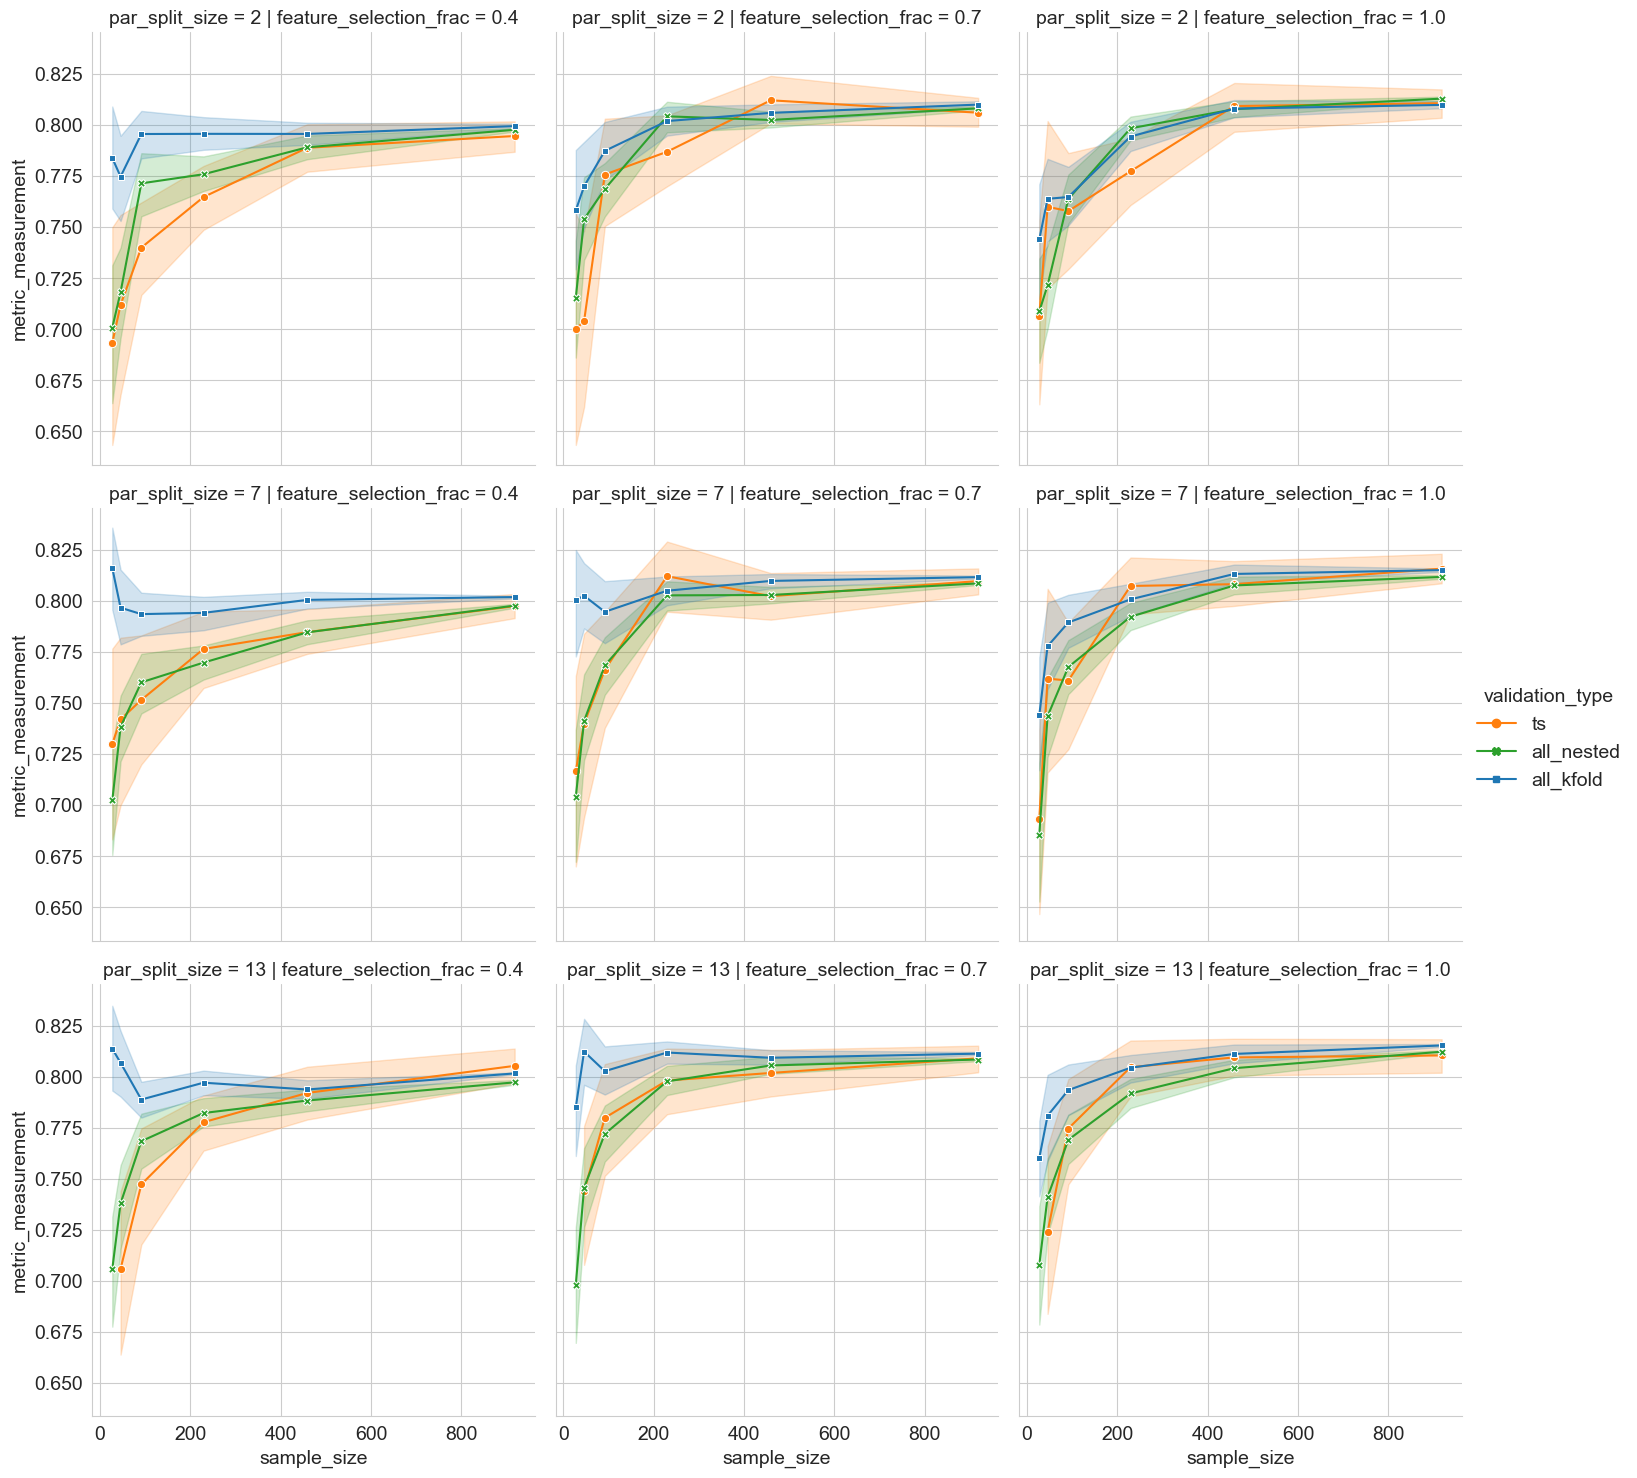

In [41]:
plt.rcParams.update({'font.size': 14})
sns.relplot(x='sample_size', data=accuracy_selection_lr_no_mix_reduced, hue='validation_type', kind='line', y='metric_measurement', ci=95, row='par_split_size', col='feature_selection_frac', palette=palette, style='validation_type', markers=True, dashes=False)
plt.show()

In [35]:
acc_par_and_feature_svm = acc_par_and_feature[acc_par_and_feature['model'] == 'svm']
acc_par_and_feature_svm

,metric_type,feature_selection_frac,train_size,sample_size,model,cv_split_size,main_metric,feature_selector,par_split_size,validation_type,metric_measurement
418700,accuracy,0.4,NaN,27.54,svm,13.0,accuracy,rfe,2,fs_nested_pt_kfold,0.807692
418701,accuracy,0.4,NaN,27.54,svm,13.0,accuracy,rfe,2,fs_nested_pt_kfold,0.666667
418702,accuracy,0.4,NaN,27.54,svm,13.0,accuracy,rfe,2,fs_nested_pt_kfold,0.820513
418703,accuracy,0.4,NaN,27.54,svm,13.0,accuracy,rfe,2,fs_nested_pt_kfold,0.923077
418704,accuracy,0.4,NaN,27.54,svm,13.0,accuracy,rfe,2,fs_nested_pt_kfold,0.807692
...,...,...,...,...,...,...,...,...,...,...,...
679195,accuracy,1.0,NaN,918.00,svm,NaN,accuracy,rfe,13,all_kfold,0.656617
679196,accuracy,1.0,NaN,918.00,svm,NaN,accuracy,rfe,13,all_kfold,0.658582
679197,accuracy,1.0,NaN,918.00,svm,NaN,accuracy,rfe,13,all_kfold,0.663195
679198,accuracy,1.0,NaN,918.00,svm,NaN,accuracy,rfe,13,all_kfold,0.644714


In [36]:
accuracy_selection_svm_no_mix = acc_par_and_feature_svm[(acc_par_and_feature_svm['validation_type'] == 'ts') | (acc_par_and_feature_svm['validation_type'] == 'all_nested') | (acc_par_and_feature_svm['validation_type'] == 'all_kfold') ]
accuracy_selection_svm_no_mix_reduced = accuracy_selection_svm_no_mix[(accuracy_selection_svm_no_mix['par_split_size'] == 2.0) | (accuracy_selection_svm_no_mix['par_split_size'] == 7.0) | (accuracy_selection_svm_no_mix['par_split_size'] == 13.0)]
accuracy_selection_svm_no_mix_reduced

,metric_type,feature_selection_frac,train_size,sample_size,model,cv_split_size,main_metric,feature_selector,par_split_size,validation_type,metric_measurement
639800,accuracy,0.4,0.8,27.54,svm,NaN,accuracy,rfe,2,ts,0.833333
639801,accuracy,0.4,0.8,27.54,svm,NaN,accuracy,rfe,2,ts,0.500000
639802,accuracy,0.4,0.8,27.54,svm,NaN,accuracy,rfe,2,ts,0.666667
639803,accuracy,0.4,0.8,27.54,svm,NaN,accuracy,rfe,2,ts,0.666667
639804,accuracy,0.4,0.8,27.54,svm,NaN,accuracy,rfe,2,ts,0.833333
...,...,...,...,...,...,...,...,...,...,...,...
679195,accuracy,1.0,NaN,918.00,svm,NaN,accuracy,rfe,13,all_kfold,0.656617
679196,accuracy,1.0,NaN,918.00,svm,NaN,accuracy,rfe,13,all_kfold,0.658582
679197,accuracy,1.0,NaN,918.00,svm,NaN,accuracy,rfe,13,all_kfold,0.663195
679198,accuracy,1.0,NaN,918.00,svm,NaN,accuracy,rfe,13,all_kfold,0.644714


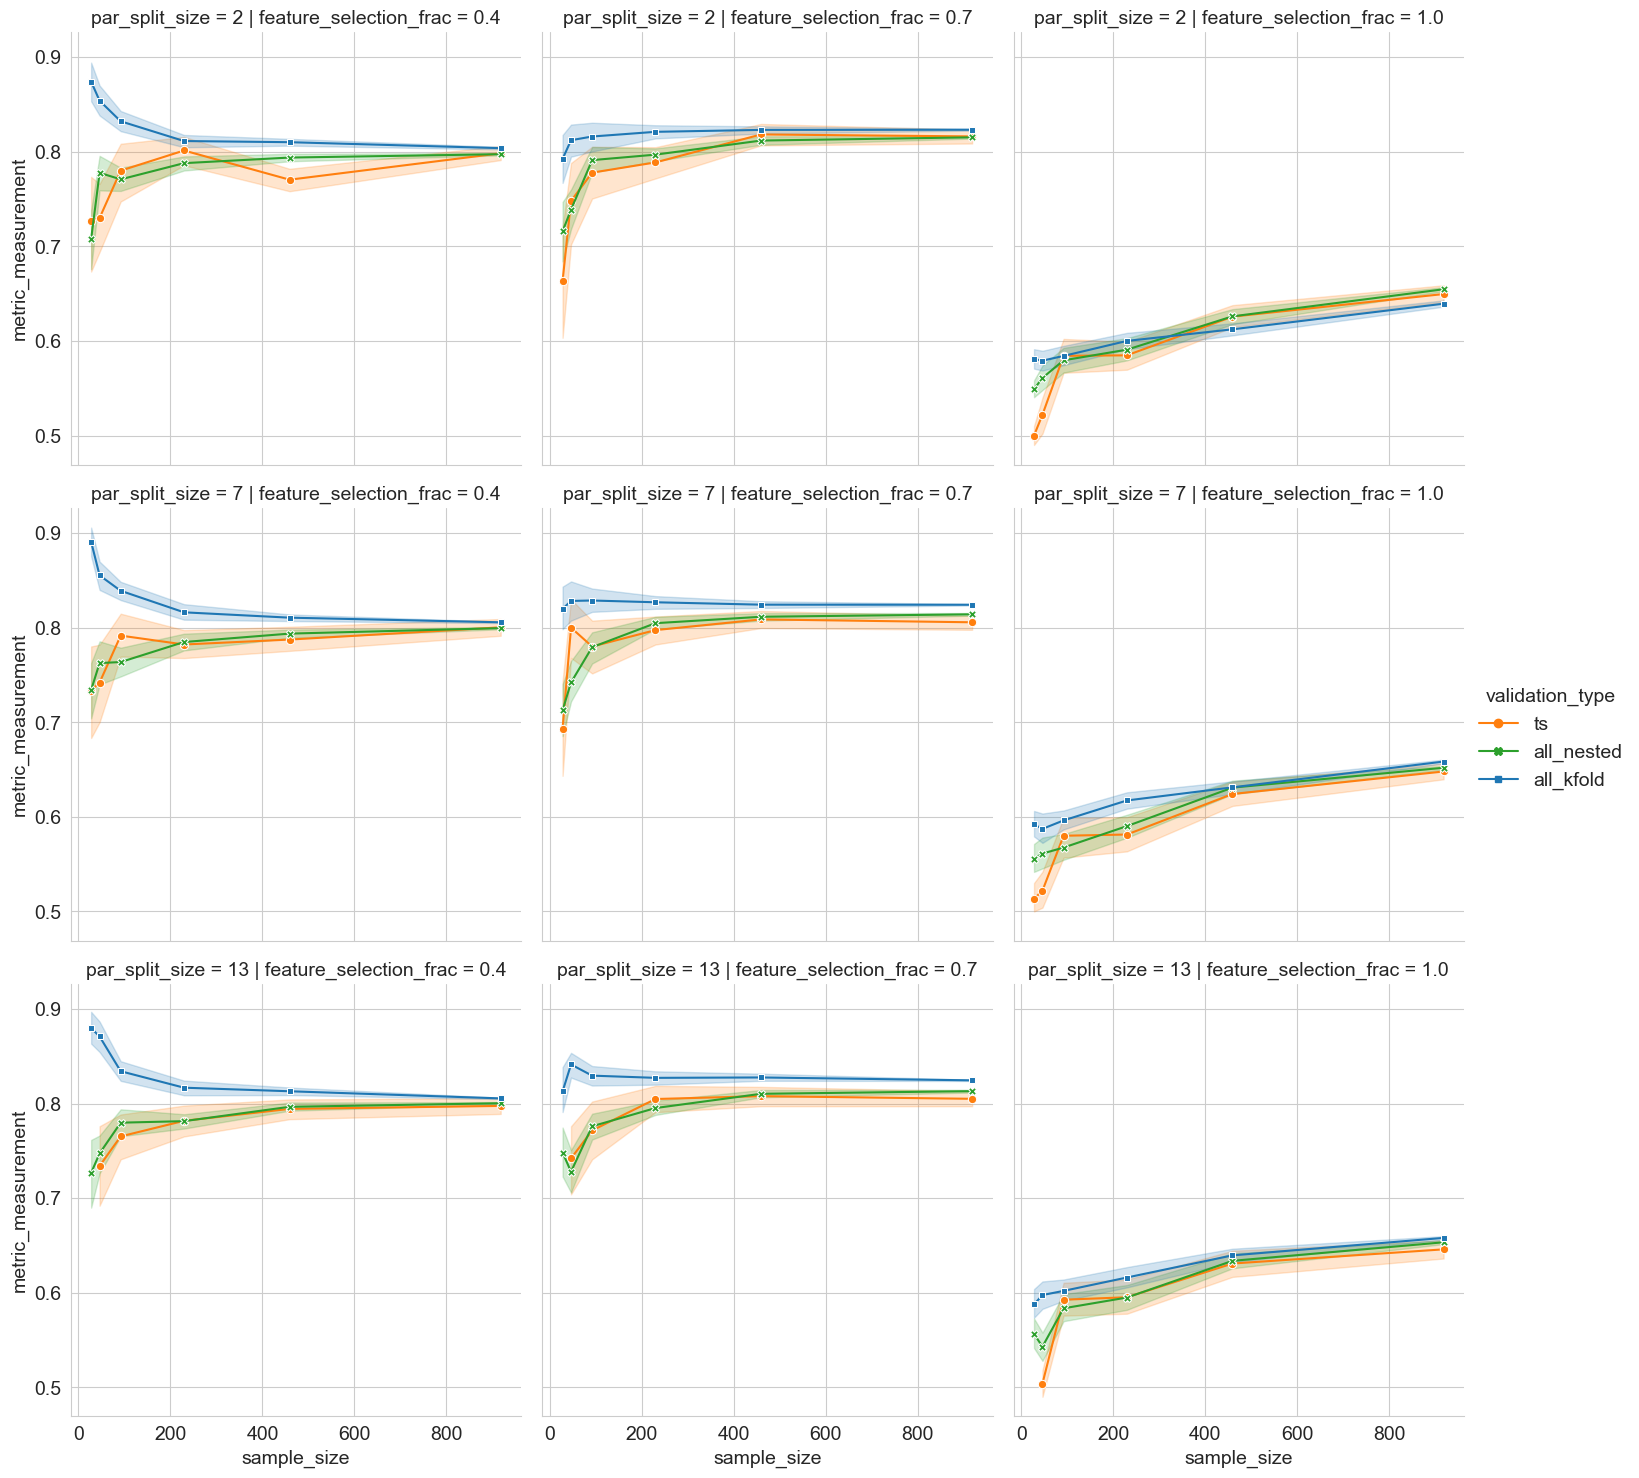

In [42]:
plt.rcParams.update({'font.size': 14})
sns.relplot(x='sample_size', data=accuracy_selection_svm_no_mix_reduced, hue='validation_type', kind='line', y='metric_measurement', col='feature_selection_frac', ci=95, row='par_split_size', palette=palette, style='validation_type', markers=True, dashes=False)
plt.show()

Now train size in train test split for svm and lr

In [20]:
acc_train_size = pivoted_all[(pivoted_all['main_metric'] == 'accuracy')
    & (pivoted_all['metric_type'] == 'accuracy')
    & (pivoted_all['validation_type'] == 'ts')
    & (pivoted_all['par_split_size'] == 13.0)
    & (pivoted_all['feature_selection_frac'] == 0.7)]

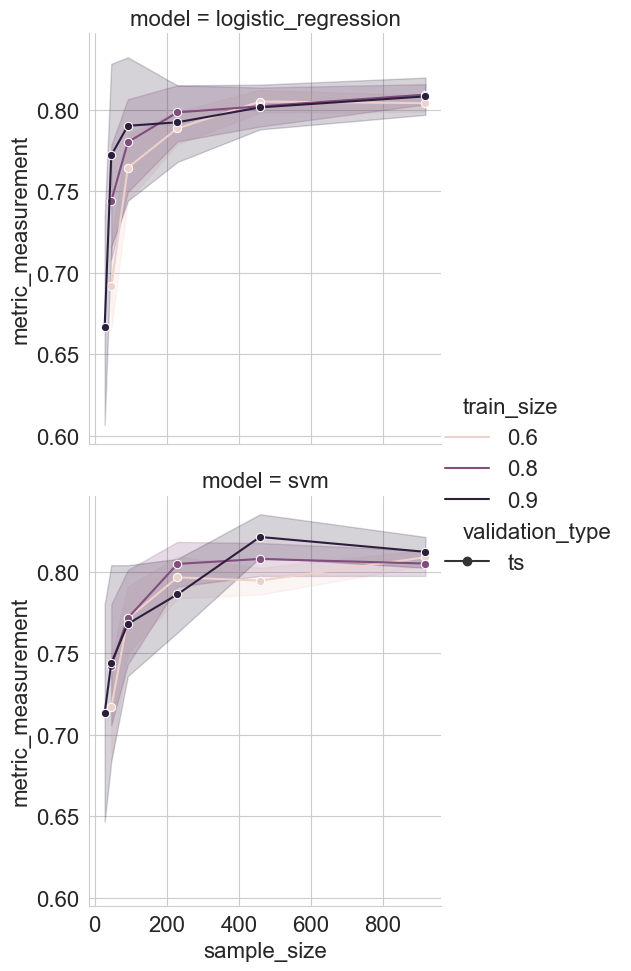

In [44]:
plt.rcParams.update({'font.size': 16})
sns.relplot(x='sample_size', data=acc_train_size, kind='line', y='metric_measurement', hue='train_size', ci=95, row='model',  style='validation_type', markers=True, dashes=False)
plt.show()

Now varying cv split size for nested

In [24]:
acc_cv_split_size = pivoted_all[(pivoted_all['main_metric'] == 'accuracy')
    & (pivoted_all['metric_type'] == 'accuracy')
    & (pivoted_all['validation_type'] == 'all_nested')
    & ((pivoted_all['cv_split_size'] == 2.0) | (pivoted_all['cv_split_size'] == 7.0) | (pivoted_all['cv_split_size'] == 13.0))
    & (pivoted_all['par_split_size'] == 13.0)
    & (pivoted_all['feature_selection_frac'] == 0.7)]

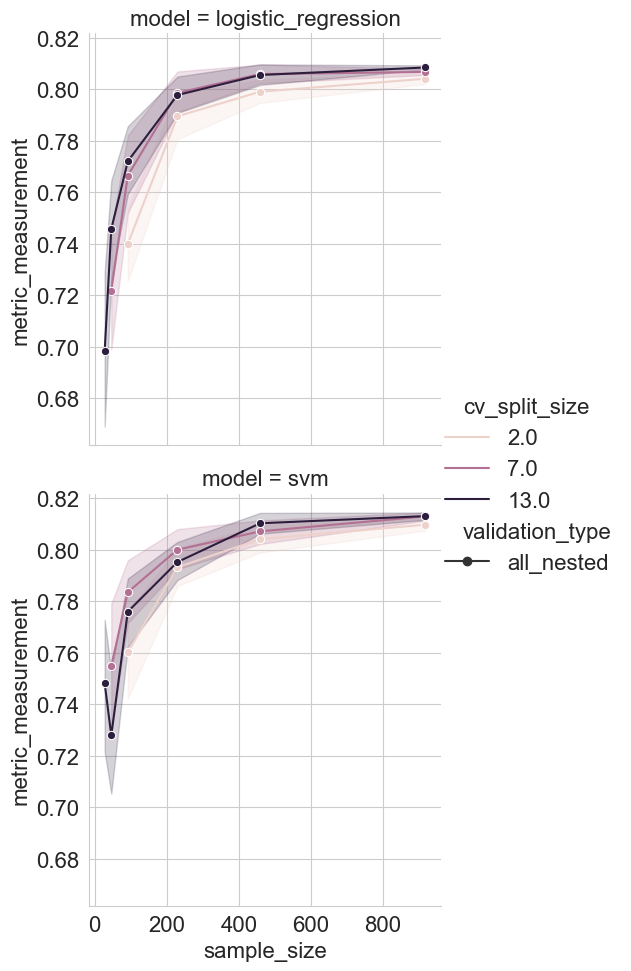

In [45]:
plt.rcParams.update({'font.size': 16})
sns.relplot(x='sample_size', data=acc_cv_split_size, hue='cv_split_size', kind='line', y='metric_measurement', ci=95, row='model', style='validation_type', markers=True, dashes=False)
plt.show()